In [1]:
import pandas as pd
import numpy as np


In [2]:
dataset=pd.read_csv('Online_Retail.csv')
dataset.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [4]:
print(dataset.isnull().sum())


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [5]:
df = dataset.drop(columns=["Description"])


In [6]:
df.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


## REMOVING OUTLIERS

In [7]:
# Define your outlier removal thresholds for Quantity and Price_per_Unit
quantity_lower = df["Quantity"].quantile(0.01)
quantity_upper = df["Quantity"].quantile(0.99)

price_lower = df["UnitPrice"].quantile(0.01)
price_upper = df["UnitPrice"].quantile(0.99)

# Filter the dataset to remove outliers
df = df[
    (df["Quantity"] >= quantity_lower) & (df["Quantity"] <= quantity_upper) &
    (df["UnitPrice"] >= price_lower) & (df["UnitPrice"] <= price_upper)
]

print(f"Shape after outlier removal: {df.shape}")


Shape after outlier removal: (524935, 7)


In [8]:
# Fill missing CustomerID with -1
df["CustomerID"] = df["CustomerID"].fillna(-1)


In [9]:
df.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [10]:
# Confirm there are no remaining missing values
print(df["CustomerID"].isnull().sum())

0


In [11]:
df["CustomerID"] = df["CustomerID"].astype(int)

In [12]:
print(df["CustomerID"].dtype)

int64


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 524935 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    524935 non-null  object 
 1   StockCode    524935 non-null  object 
 2   Quantity     524935 non-null  int64  
 3   InvoiceDate  524935 non-null  object 
 4   UnitPrice    524935 non-null  float64
 5   CustomerID   524935 non-null  int64  
 6   Country      524935 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 32.0+ MB


In [14]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"], errors='coerce')


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 524935 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    524935 non-null  object        
 1   StockCode    524935 non-null  object        
 2   Quantity     524935 non-null  int64         
 3   InvoiceDate  225649 non-null  datetime64[ns]
 4   UnitPrice    524935 non-null  float64       
 5   CustomerID   524935 non-null  int64         
 6   Country      524935 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 32.0+ MB


In [16]:
df["Year"] = df["InvoiceDate"].dt.year
df["Month"] = df["InvoiceDate"].dt.month
df["Day"] = df["InvoiceDate"].dt.day
df["Weekday"] = df["InvoiceDate"].dt.weekday  # 0=Monday, 6=Sunday
df["DayOfWeek"] = df["InvoiceDate"].dt.dayofweek  # 0=Monday, 6=Sunday
df["WeekOfYear"] = df["InvoiceDate"].dt.isocalendar().week

In [17]:
df.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day,Weekday,DayOfWeek,WeekOfYear
0,536365,85123A,6,2010-01-12 08:26:00,2.55,17850,United Kingdom,2010.0,1.0,12.0,1.0,1.0,2
1,536365,71053,6,2010-01-12 08:26:00,3.39,17850,United Kingdom,2010.0,1.0,12.0,1.0,1.0,2
2,536365,84406B,8,2010-01-12 08:26:00,2.75,17850,United Kingdom,2010.0,1.0,12.0,1.0,1.0,2
3,536365,84029G,6,2010-01-12 08:26:00,3.39,17850,United Kingdom,2010.0,1.0,12.0,1.0,1.0,2
4,536365,84029E,6,2010-01-12 08:26:00,3.39,17850,United Kingdom,2010.0,1.0,12.0,1.0,1.0,2


In [18]:
df = df[df["Quantity"] > 0]
df = df[df["UnitPrice"] > 0]

In [19]:
df.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day,Weekday,DayOfWeek,WeekOfYear
0,536365,85123A,6,2010-01-12 08:26:00,2.55,17850,United Kingdom,2010.0,1.0,12.0,1.0,1.0,2
1,536365,71053,6,2010-01-12 08:26:00,3.39,17850,United Kingdom,2010.0,1.0,12.0,1.0,1.0,2
2,536365,84406B,8,2010-01-12 08:26:00,2.75,17850,United Kingdom,2010.0,1.0,12.0,1.0,1.0,2
3,536365,84029G,6,2010-01-12 08:26:00,3.39,17850,United Kingdom,2010.0,1.0,12.0,1.0,1.0,2
4,536365,84029E,6,2010-01-12 08:26:00,3.39,17850,United Kingdom,2010.0,1.0,12.0,1.0,1.0,2


In [20]:
df=df.drop_duplicates()

In [21]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Quantity,0
InvoiceDate,293535
UnitPrice,0
CustomerID,0
Country,0
Year,293535
Month,293535
Day,293535


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 514688 entries, 0 to 541908
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    514688 non-null  object        
 1   StockCode    514688 non-null  object        
 2   Quantity     514688 non-null  int64         
 3   InvoiceDate  221153 non-null  datetime64[ns]
 4   UnitPrice    514688 non-null  float64       
 5   CustomerID   514688 non-null  int64         
 6   Country      514688 non-null  object        
 7   Year         221153 non-null  float64       
 8   Month        221153 non-null  float64       
 9   Day          221153 non-null  float64       
 10  Weekday      221153 non-null  float64       
 11  DayOfWeek    221153 non-null  float64       
 12  WeekOfYear   221153 non-null  UInt32        
dtypes: UInt32(1), datetime64[ns](1), float64(6), int64(2), object(3)
memory usage: 53.5+ MB


In [22]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')
df['InvoiceDate'] = df['InvoiceDate'].ffill()  # Forward-fill missing InvoiceDate



In [23]:
df['Quantity'] = df['Quantity'].fillna(df['Quantity'].mean())
df['CustomerID'] = df['CustomerID'].fillna('Unknown')
df['StockCode'] = df['StockCode'].fillna('Unknown')


In [24]:
print(df.isna().sum())  # Check if any missing values are left


InvoiceNo           0
StockCode           0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID          0
Country             0
Year           293535
Month          293535
Day            293535
Weekday        293535
DayOfWeek      293535
WeekOfYear     293535
dtype: int64


In [25]:
df['Year'] = df['Year'].ffill()  # Forward-fill missing Year
df['Month'] = df['Month'].ffill()  # Forward-fill missing Month
df['Day'] = df['Day'].ffill()  # Forward-fill missing Day
df['Weekday'] = df['Weekday'].ffill()  # Forward-fill missing Weekday
df['DayOfWeek'] = df['DayOfWeek'].ffill()  # Forward-fill missing DayOfWeek
df['WeekOfYear'] = df['WeekOfYear'].ffill()  # Forward-fill missing WeekOfYear


In [26]:
print(df.isna().sum())

InvoiceNo      0
StockCode      0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
Year           0
Month          0
Day            0
Weekday        0
DayOfWeek      0
WeekOfYear     0
dtype: int64


In [27]:
df["Quantity"].unique()

array([  6,   8,   2,  32,   3,   4,  24,  12,  48,  18,  20,  36,  80,
        64,  10,  96,  23,   5,   1,  50,  40, 100,  16,   9,  25,  30,
        28,   7,  72,  14,  11,  33,  13,  70,  60,  27,  15,  22,  19,
        17,  21,  34,  47,  52,  75,  42,  69,  39,  56,  26,  31,  82,
        78,  97,  98,  35,  38,  37,  49,  95,  29,  41,  54,  67,  66,
        44,  55,  46,  99,  61,  84,  45,  68,  65,  53,  76,  71,  90,
        43,  58,  57,  59,  62,  89,  73,  94,  86,  81,  88,  74,  93,
        63,  83,  85,  51,  87,  79,  92,  91,  77])

In [28]:
df["CustomerID"].unique()

array([17850, 13047, 12583, ..., 13298, 14569, 12713])

In [29]:
# Missing values count
missing_values = df.isnull().sum()

# Percent of missing values
missing_percent = (df.isnull().sum() / len(df)) * 100

# Display missing value information
missing_values, missing_percent


(InvoiceNo      0
 StockCode      0
 Quantity       0
 InvoiceDate    0
 UnitPrice      0
 CustomerID     0
 Country        0
 Year           0
 Month          0
 Day            0
 Weekday        0
 DayOfWeek      0
 WeekOfYear     0
 dtype: int64,
 InvoiceNo      0.0
 StockCode      0.0
 Quantity       0.0
 InvoiceDate    0.0
 UnitPrice      0.0
 CustomerID     0.0
 Country        0.0
 Year           0.0
 Month          0.0
 Day            0.0
 Weekday        0.0
 DayOfWeek      0.0
 WeekOfYear     0.0
 dtype: float64)

In [30]:
quantities = np.array(df["Quantity"].unique())


In [31]:
Q1 = np.percentile(quantities, 25)
Q3 = np.percentile(quantities, 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
filtered_quantities = quantities[(quantities >= lower_bound) & (quantities <= upper_bound)]

# Log transformation for visualization
log_quantities = np.log1p(filtered_quantities)

# Distribution of numerical features (e.g., Quantity, UnitPrice)


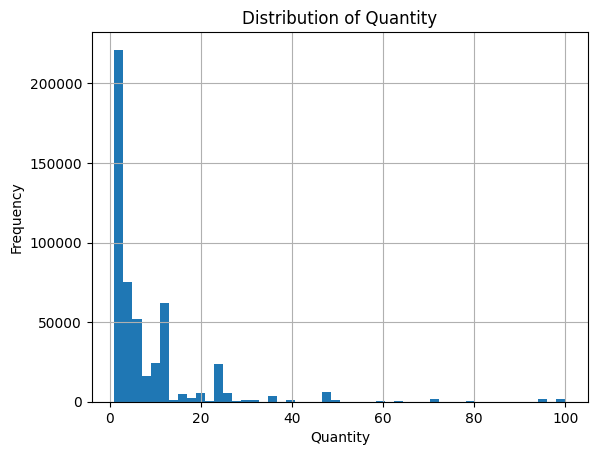

In [32]:
import matplotlib.pyplot as plt

# Distribution of Quantity
df["Quantity"].hist(bins=50)
plt.title("Distribution of Quantity")  # Set the title for the plot
plt.xlabel("Quantity")  # Set the x-axis label
plt.ylabel("Frequency")  # Set the y-axis label
plt.show()  # Show the plot


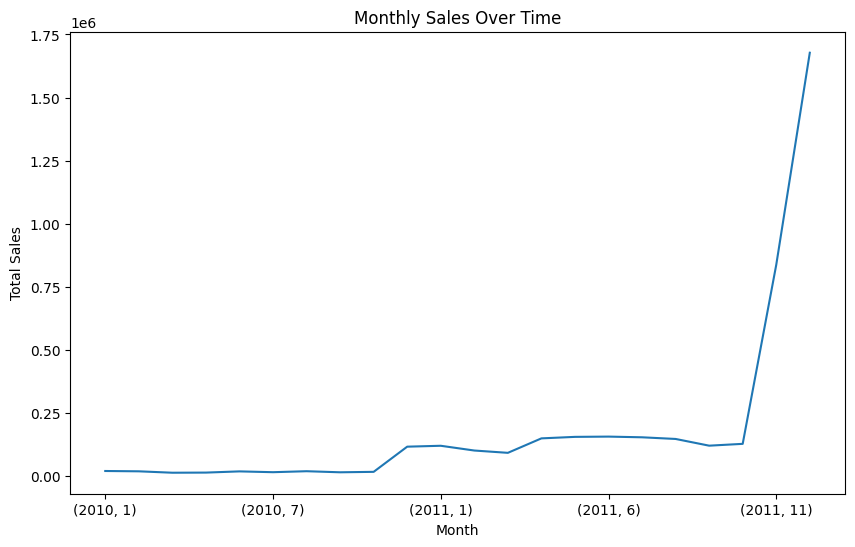

In [44]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"], errors='coerce')
df["Year"] = df["InvoiceDate"].dt.year
df["Month"] = df["InvoiceDate"].dt.month

# Sales over time (monthly)
monthly_sales = df.groupby(["Year", "Month"])["Quantity"].sum()

# Plot monthly sales
monthly_sales.plot(kind="line", figsize=(10, 6))
plt.title("Monthly Sales Over Time")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()


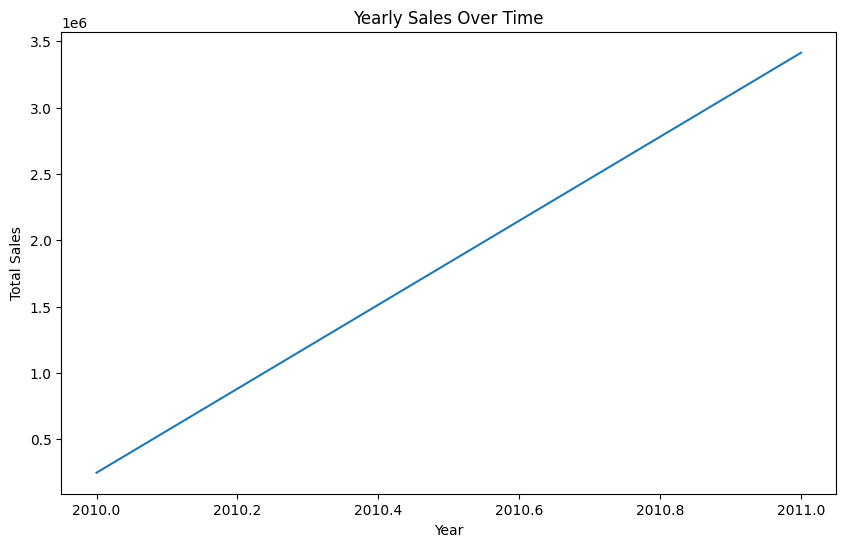

In [ ]:
# Group by 'Year' and sum the 'Quantity' for total sales per year
yearly_sales = df.groupby("Year")["Quantity"].sum()

# Plot yearly sales
yearly_sales.plot(kind="line", figsize=(10, 6))
plt.title("Yearly Sales Over Time")
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.show()


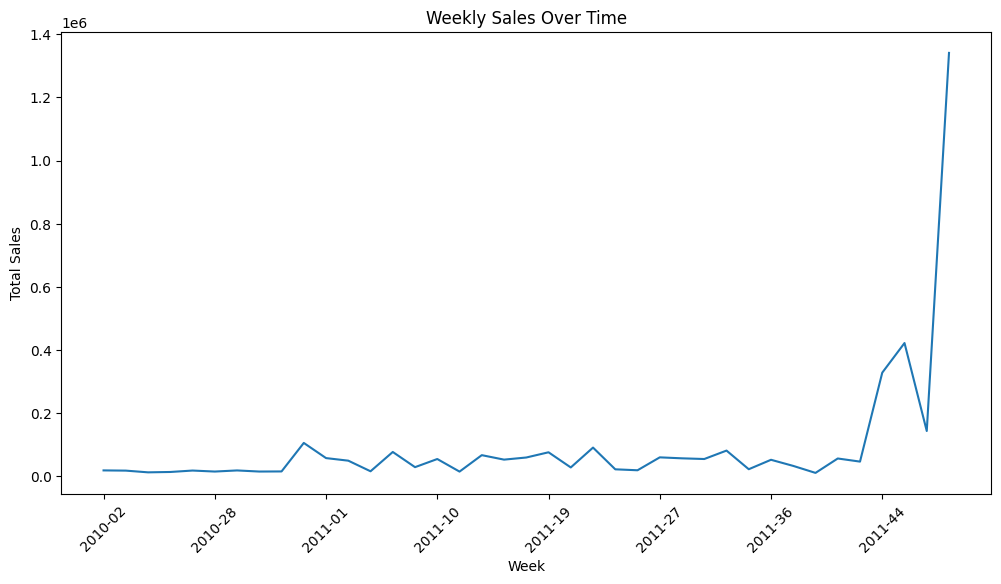

In [ ]:
# Create a 'Week' column in the format: Year-Week
df["Week"] = df["InvoiceDate"].dt.strftime('%Y-%U')

# Group by 'Week' and sum the 'Quantity' for total sales per week
weekly_sales = df.groupby("Week")["Quantity"].sum()

# Plot weekly sales
weekly_sales.plot(kind="line", figsize=(12, 6))
plt.title("Weekly Sales Over Time")
plt.xlabel("Week")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()


# Distribution of UnitPrice


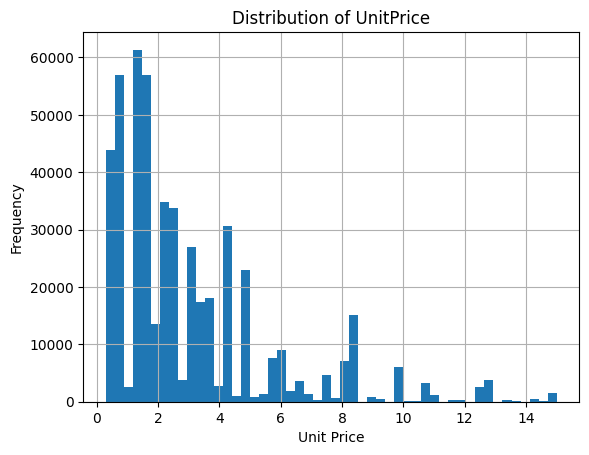

In [ ]:
df["UnitPrice"].hist(bins=50)
plt.title("Distribution of UnitPrice")
plt.xlabel("Unit Price")
plt.ylabel("Frequency")
plt.show()


## LETS CREATE A FUNCTION THAT PROVIDES CHARTS - Day, Weekday, DayOfWeak and WeekOfYear

In [33]:
df["TotalSales"] = df["Quantity"] * df["UnitPrice"]


In [34]:
df.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day,Weekday,DayOfWeek,WeekOfYear,TotalSales
0,536365,85123A,6,2010-01-12 08:26:00,2.55,17850,United Kingdom,2010.0,1.0,12.0,1.0,1.0,2,15.30
1,536365,71053,6,2010-01-12 08:26:00,3.39,17850,United Kingdom,2010.0,1.0,12.0,1.0,1.0,2,20.34
2,536365,84406B,8,2010-01-12 08:26:00,2.75,17850,United Kingdom,2010.0,1.0,12.0,1.0,1.0,2,22.00
3,536365,84029G,6,2010-01-12 08:26:00,3.39,17850,United Kingdom,2010.0,1.0,12.0,1.0,1.0,2,20.34
4,536365,84029E,6,2010-01-12 08:26:00,3.39,17850,United Kingdom,2010.0,1.0,12.0,1.0,1.0,2,20.34


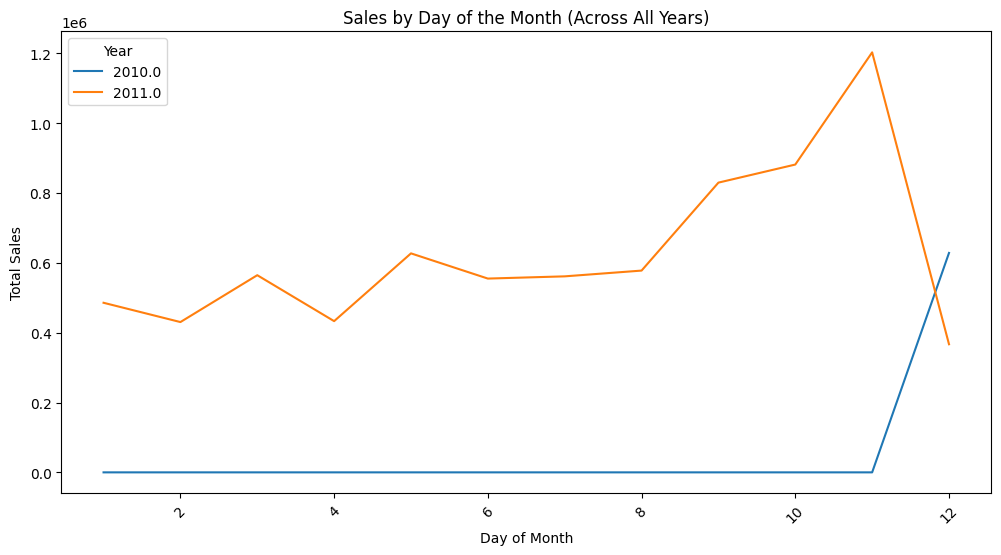

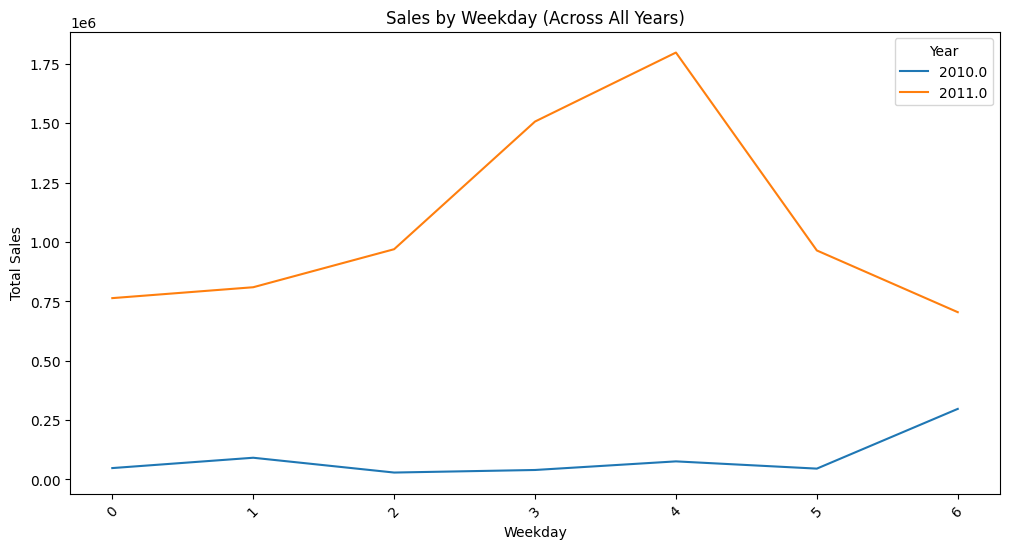

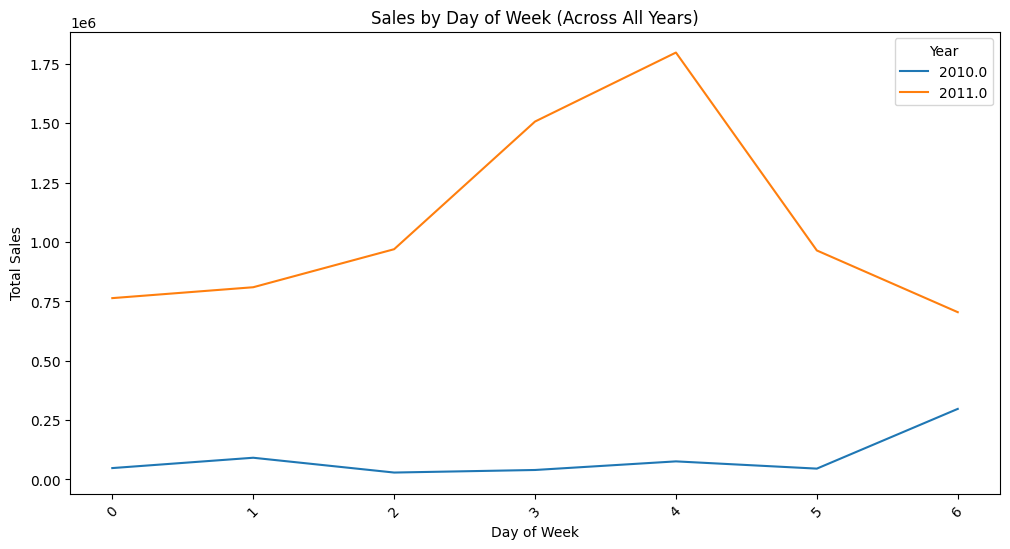

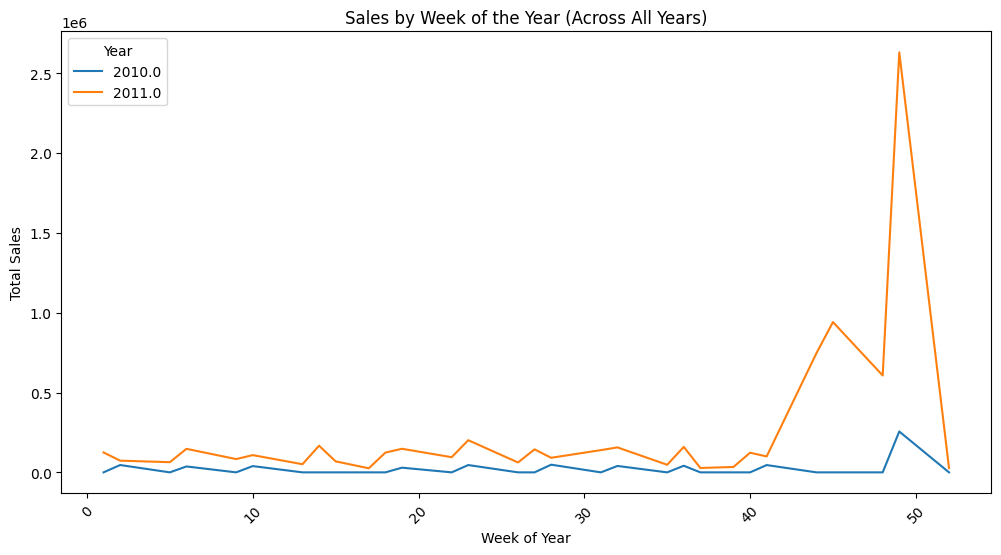

In [35]:
import matplotlib.pyplot as plt

# Function to generate plots based on different time periods
def generate_sales_plots(df, time_period, title, xlabel, ylabel):
    """Helper function to generate plots for different time periods."""
    # Group by time period and sum the total sales
    sales_by_time_period = df.groupby([time_period, "Year"])["TotalSales"].sum().unstack(fill_value=0)

    # Plotting the sales
    sales_by_time_period.plot(kind="line", figsize=(12, 6))
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45)
    plt.legend(title="Year")
    plt.show()

# 1. Sales by Day of the Month (Across all years)
generate_sales_plots(df, "Day", "Sales by Day of the Month (Across All Years)", "Day of Month", "Total Sales")

# 2. Sales by Weekday (0=Monday, 6=Sunday) across all years
generate_sales_plots(df, "Weekday", "Sales by Weekday (Across All Years)", "Weekday", "Total Sales")

# 3. Sales by Day of the Week (0=Monday, 6=Sunday) across all years
generate_sales_plots(df, "DayOfWeek", "Sales by Day of Week (Across All Years)", "Day of Week", "Total Sales")

# 4. Sales by Week of the Year across all years
generate_sales_plots(df, "WeekOfYear", "Sales by Week of the Year (Across All Years)", "Week of Year", "Total Sales")


## Hypothesis testing

Hypothesis 1 : Weekends See Higher Sales than Weekdays, we'll compare the average Quantity or Revenue for weekends (Saturday and Sunday) and weekdays (Monday to Friday).

Two-Sample T-Test: This test compares the means of the two independent groups (weekdays and weekends) to see if there’s a statistically significant difference between them.

Null Hypothesis (H₀): There is no difference in average sales (quantity or revenue) between weekdays and weekends.

Alternative Hypothesis (H₁): There is a significant difference in average sales between weekdays and weekends.



## Now, let's perform the ANOVA test to see if there is a significant difference in total sales between weekdays.

In [47]:
# Ensure 'Weekend' column is added
df['Weekend'] = df['Weekday'].apply(lambda x: 'Weekend' if x in [6, 7] else 'Weekday')


In [48]:
import pandas as pd

# Step 1: Create a Revenue column
df['Revenue'] = df['Quantity'] * df['UnitPrice']

# Step 2: Classify days into weekdays (Mon-Fri) and weekends (Sat-Sun)
# Weekday: 0=Monday, 1=Tuesday, ..., 6=Sunday
df['DayType'] = df['Weekday'].apply(lambda x: 'Weekend' if x in [5, 6] else 'Weekday')

# Step 3: Calculate average Quantity and Revenue for Weekends and Weekdays
avg_sales = df.groupby('DayType').agg({'Quantity': 'mean', 'Revenue': 'mean'})

# Step 4: Display the results
print(avg_sales)



         Quantity    Revenue
DayType                     
Weekday  8.074084  15.963153
Weekend  7.750768  15.410107


In [ ]:
import scipy.stats as stats
import seaborn as sns


# Step 1: Separate the data for weekdays and weekends
weekdays_data = df[df['DayType'] == 'Weekday']
weekends_data = df[df['DayType'] == 'Weekend']

# Step 2: Perform t-test for Quantity
t_stat_quantity, p_value_quantity = stats.ttest_ind(weekdays_data['Quantity'].dropna(), weekends_data['Quantity'].dropna())

# Step 3: Perform t-test for Revenue
t_stat_revenue, p_value_revenue = stats.ttest_ind(weekdays_data['Revenue'].dropna(), weekends_data['Revenue'].dropna())

# Step 4: Display the results
print("T-test for Quantity:")
print(f"T-statistic: {t_stat_quantity}, P-value: {p_value_quantity}")

print("\nT-test for Revenue:")
print(f"T-statistic: {t_stat_revenue}, P-value: {p_value_revenue}")

if p_value_quantity < 0.05:
    print("\nThe difference in Quantity between weekdays and weekends is statistically significant.")
else:
    print("\nThe difference in Quantity between weekdays and weekends is not statistically significant.")

if p_value_revenue < 0.05:
    print("\nThe difference in Revenue between weekdays and weekends is statistically significant.")
else:
    print("\nThe difference in Revenue between weekdays and weekends is not statistically significant.")


T-test for Quantity:
T-statistic: 6.60182669685787, P-value: 4.065232152594626e-11

T-test for Revenue:
T-statistic: 3.8787089678140667, P-value: 0.00010502564996649763

The difference in Quantity between weekdays and weekends is statistically significant.

The difference in Revenue between weekdays and weekends is statistically significant.


# Plot Revenue for Weekends vs Weekdays

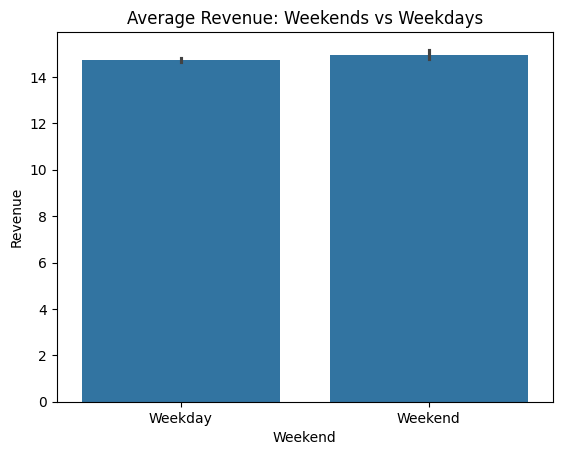

In [ ]:
sns.barplot(x='Weekend', y='Revenue', data=df)
plt.title('Average Revenue: Weekends vs Weekdays')
plt.show()


Hypothesis 7: Customer Purchasing Patterns Depend on Weekday

Null Hypothesis (H₀):
There is no significant difference in customer purchasing patterns (either Quantity or Revenue) between weekdays and weekends. In other words, customer purchases are not influenced by the day of the week.

Alternative Hypothesis (H₁):
There is a significant difference in customer purchasing patterns (either Quantity or Revenue) between weekdays and weekends. In other words, customer purchases vary depending on the day of the week.

<ipython-input-81-df5821550ab4>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_quantity_by_day.index, y=avg_quantity_by_day.values, palette="viridis")
<ipython-input-81-df5821550ab4>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_revenue_by_day.index, y=avg_revenue_by_day.values, palette="viridis")


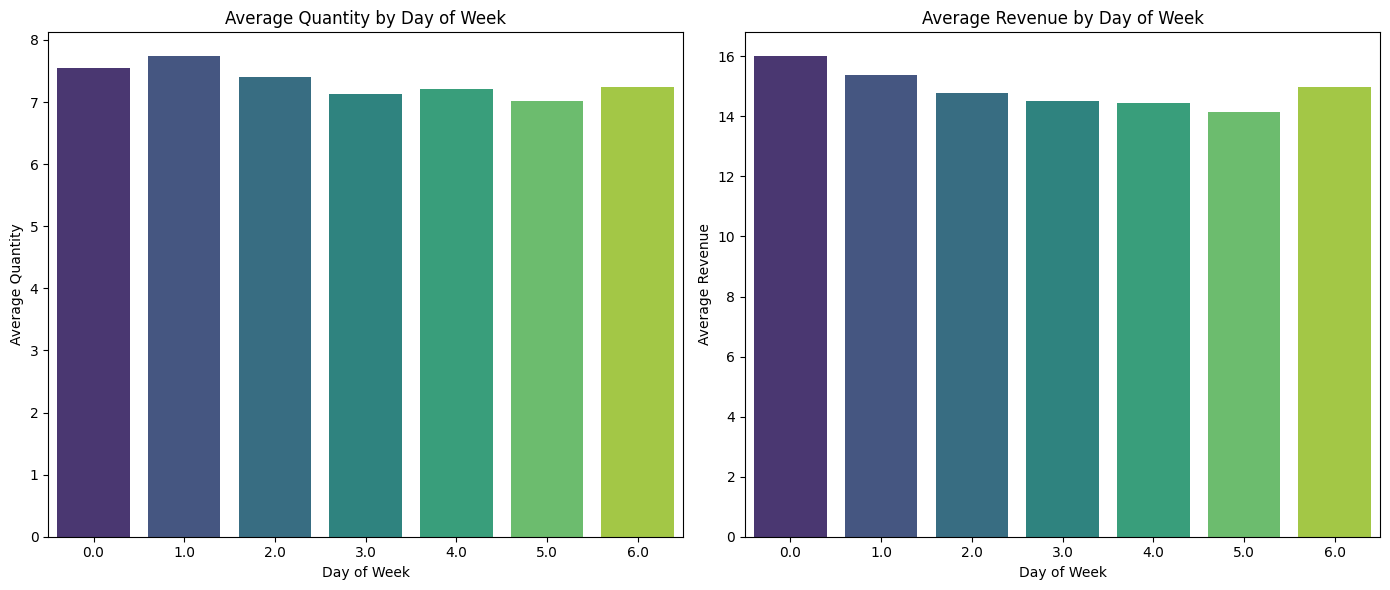

ANOVA Test for Quantity: F-statistic = 39.86437445021815, P-value = 8.60896474350662e-49
ANOVA Test for Revenue: F-statistic = 41.7623658935838, P-value = 3.1867164204209895e-51


In [ ]:
import scipy.stats as stats


avg_quantity_by_day = df.groupby('DayOfWeek')['Quantity'].mean()
avg_revenue_by_day = df.groupby('DayOfWeek')['Revenue'].mean()

# Plot the average Quantity and Revenue by DayOfWeek
plt.figure(figsize=(14, 6))

# Subplot for Quantity
plt.subplot(1, 2, 1)
sns.barplot(x=avg_quantity_by_day.index, y=avg_quantity_by_day.values, palette="viridis")
plt.title('Average Quantity by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Quantity')

# Subplot for Revenue
plt.subplot(1, 2, 2)
sns.barplot(x=avg_revenue_by_day.index, y=avg_revenue_by_day.values, palette="viridis")
plt.title('Average Revenue by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Revenue')

plt.tight_layout()
plt.show()

from scipy.stats import f_oneway

# Statistical Testing - ANOVA for Quantity
anova_quantity = f_oneway(*[df[df['DayOfWeek'] == day]['Quantity'] for day in df['DayOfWeek'].unique()])
print(f'ANOVA Test for Quantity: F-statistic = {anova_quantity.statistic}, P-value = {anova_quantity.pvalue}')

# Statistical Testing - ANOVA for Revenue
anova_revenue = f_oneway(*[df[df['DayOfWeek'] == day]['Revenue'] for day in df['DayOfWeek'].unique()])
print(f'ANOVA Test for Revenue: F-statistic = {anova_revenue.statistic}, P-value = {anova_revenue.pvalue}')


Conclusion:

Null Hypothesis (H0): There is no difference in customer purchasing patterns across different days of the week.

Alternative Hypothesis (H1): There is a difference in customer purchasing patterns across different days of the week.
Since the P-values are very small, we reject the null hypothesis and conclude that customer purchasing patterns do indeed depend on the day of the week.

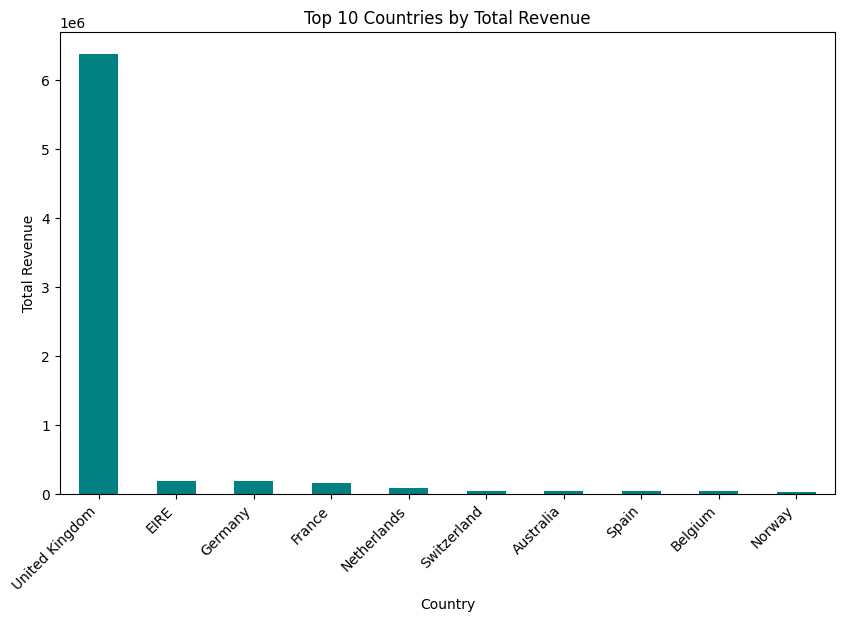

In [ ]:
# Grouping by country and calculating total revenue
country_revenue = df.groupby('Country')['Revenue'].sum().sort_values(ascending=False).head(10)

# Plotting the top 10 countries by revenue
plt.figure(figsize=(10, 6))
country_revenue.plot(kind='bar', color='teal')
plt.title('Top 10 Countries by Total Revenue')
plt.xlabel('Country')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45, ha='right')
plt.show()


## *Quantity and Revenue Correlation*

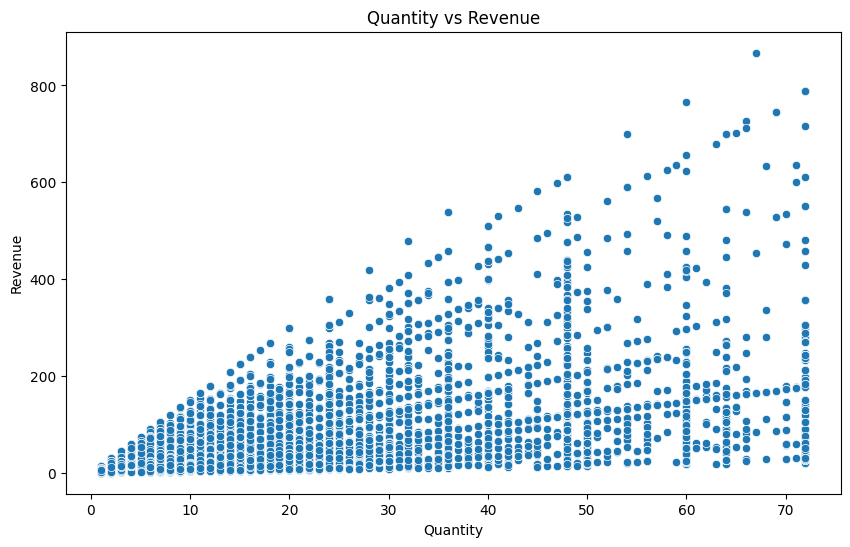

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Quantity', y='Revenue')
plt.title('Quantity vs Revenue')
plt.xlabel('Quantity')
plt.ylabel('Revenue')
plt.show()


In [49]:
df.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day,Weekday,DayOfWeek,WeekOfYear,TotalSales,Weekend,Revenue,DayType
0,536365,85123A,6,2010-01-12 08:26:00,2.55,17850,United Kingdom,2010,1,12.0,1.0,1.0,2,15.30,Weekday,15.30,Weekday
1,536365,71053,6,2010-01-12 08:26:00,3.39,17850,United Kingdom,2010,1,12.0,1.0,1.0,2,20.34,Weekday,20.34,Weekday
2,536365,84406B,8,2010-01-12 08:26:00,2.75,17850,United Kingdom,2010,1,12.0,1.0,1.0,2,22.00,Weekday,22.00,Weekday
3,536365,84029G,6,2010-01-12 08:26:00,3.39,17850,United Kingdom,2010,1,12.0,1.0,1.0,2,20.34,Weekday,20.34,Weekday
4,536365,84029E,6,2010-01-12 08:26:00,3.39,17850,United Kingdom,2010,1,12.0,1.0,1.0,2,20.34,Weekday,20.34,Weekday


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 502910 entries, 0 to 541908
Data columns (total 19 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    502910 non-null  object        
 1   StockCode    502910 non-null  object        
 2   Quantity     502910 non-null  int64         
 3   InvoiceDate  502910 non-null  datetime64[ns]
 4   UnitPrice    502910 non-null  float64       
 5   CustomerID   502910 non-null  int64         
 6   Country      502910 non-null  object        
 7   Year         502910 non-null  int32         
 8   Month        502910 non-null  int32         
 9   Day          502910 non-null  float64       
 10  Weekday      502910 non-null  float64       
 11  DayOfWeek    502910 non-null  float64       
 12  WeekOfYear   502910 non-null  UInt32        
 13  Week         502910 non-null  object        
 14  TotalSales   502910 non-null  float64       
 15  DayOfMonth   502910 non-null  int32    

In [69]:
# Define the important columns relevant for inventory optimization
important_columns = ['StockCode', 'Quantity', 'UnitPrice', 'Country', 'CustomerID', 'Year', 'Month', 'Day', 'Weekday']

# Create a new dataset with only the important columns
important_df = df[important_columns]

# Check the new dataset
important_df.head()


,StockCode,Quantity,UnitPrice,Country,CustomerID,Year,Month,Day,Weekday
0,85123A,6,2.55,United Kingdom,17850,2010.0,1.0,12.0,1.0
1,71053,6,3.39,United Kingdom,17850,2010.0,1.0,12.0,1.0
2,84406B,8,2.75,United Kingdom,17850,2010.0,1.0,12.0,1.0
3,84029G,6,3.39,United Kingdom,17850,2010.0,1.0,12.0,1.0
4,84029E,6,3.39,United Kingdom,17850,2010.0,1.0,12.0,1.0


In [70]:
important_df['Day'] = important_df['Day'].astype(int)
important_df['Weekday'] = important_df['Weekday'].astype(int)


<ipython-input-70-b8897d8c2715>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  important_df['Day'] = important_df['Day'].astype(int)
<ipython-input-70-b8897d8c2715>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  important_df['Weekday'] = important_df['Weekday'].astype(int)


In [71]:
important_df['Revenue'] = important_df['Quantity'] * important_df['UnitPrice']
df_agg = important_df.groupby(['Year', 'Month', 'CustomerID', 'Weekday']).agg({
    'Quantity': 'sum',
    'Revenue': 'sum',
    'UnitPrice': 'mean'
}).reset_index()


<ipython-input-71-240f2abc34b7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  important_df['Revenue'] = important_df['Quantity'] * important_df['UnitPrice']


In [72]:
df_agg.head()

,Year,Month,CustomerID,Weekday,Quantity,Revenue,UnitPrice
0,2010.0,1.0,-1,1,2669,10588.96,4.403496
1,2010.0,1.0,12431,1,107,358.25,5.278571
2,2010.0,1.0,12433,1,1852,1919.14,1.406438
3,2010.0,1.0,12583,1,449,855.86,2.764500
4,2010.0,1.0,12662,1,157,261.48,2.958000


In [40]:
df_agg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14714 entries, 0 to 14713
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Year        14714 non-null  float64
 1   Month       14714 non-null  float64
 2   CustomerID  14714 non-null  int64  
 3   Weekday     14714 non-null  int64  
 4   Quantity    14714 non-null  int64  
 5   Revenue     14714 non-null  float64
 6   UnitPrice   14714 non-null  float64
dtypes: float64(4), int64(3)
memory usage: 804.8 KB


In [73]:
# Average revenue per customer
df_agg['AvgRevenuePerCustomer'] = df_agg['Revenue'] / df_agg['CustomerID']

# Total purchases per month
monthly_data = df_agg.groupby(['Year', 'Month'])[['Quantity', 'Revenue']].sum().reset_index()
monthly_data.rename(columns={'Quantity': 'TotalQuantityPerMonth', 'Revenue': 'TotalRevenuePerMonth'}, inplace=True)

# Merge back with the main dataframe
df_agg = df_agg.merge(monthly_data, on=['Year', 'Month'], how='left')

# Create lag features
df_agg['Lag_Quantity'] = df_agg['Quantity'].shift(1)
df_agg['Lag_Revenue'] = df_agg['Revenue'].shift(1)

# Create moving averages
df_agg['MA_Quantity'] = df_agg['Quantity'].rolling(window=3).mean()
df_agg['MA_Revenue'] = df_agg['Revenue'].rolling(window=3).mean()


In [74]:
df_agg.head()

,Year,Month,CustomerID,Weekday,Quantity,Revenue,UnitPrice,AvgRevenuePerCustomer,TotalQuantityPerMonth,TotalRevenuePerMonth,Lag_Quantity,Lag_Revenue,MA_Quantity,MA_Revenue
0,2010.0,1.0,-1,1,2669,10588.96,4.403496,-10588.960000,20480,45891.82,NaN,NaN,NaN,NaN
1,2010.0,1.0,12431,1,107,358.25,5.278571,0.028819,20480,45891.82,2669.0,10588.96,NaN,NaN
2,2010.0,1.0,12433,1,1852,1919.14,1.406438,0.154359,20480,45891.82,107.0,358.25,1542.666667,4288.783333
3,2010.0,1.0,12583,1,449,855.86,2.764500,0.068017,20480,45891.82,1852.0,1919.14,802.666667,1044.416667
4,2010.0,1.0,12662,1,157,261.48,2.958000,0.020651,20480,45891.82,449.0,855.86,819.333333,1012.160000


In [75]:
df_agg['Lag_Quantity'] = df_agg['Lag_Quantity'].fillna(0)
df_agg['Lag_Revenue'] = df_agg['Lag_Revenue'].fillna(0)
df_agg['MA_Quantity'] = df_agg['MA_Quantity'].fillna(df_agg['MA_Quantity'].mean())
df_agg['MA_Revenue'] = df_agg['MA_Revenue'].fillna(df_agg['MA_Revenue'].mean())


In [76]:
df_agg['Day'] = important_df['Day']


In [54]:
df_agg

,Year,Month,CustomerID,Weekday,Quantity,Revenue,UnitPrice,AvgRevenuePerCustomer,TotalQuantityPerMonth,TotalRevenuePerMonth,Lag_Quantity,Lag_Revenue,MA_Quantity,MA_Revenue,Day
0,2010.0,1.0,-1,1,2669,10588.96,4.403496,-10588.960000,20480,45891.82,0.0,0.00,279.412543,552.997384,12.0
1,2010.0,1.0,12431,1,107,358.25,5.278571,0.028819,20480,45891.82,2669.0,10588.96,279.412543,552.997384,12.0
2,2010.0,1.0,12433,1,1852,1919.14,1.406438,0.154359,20480,45891.82,107.0,358.25,1542.666667,4288.783333,12.0
3,2010.0,1.0,12583,1,449,855.86,2.764500,0.068017,20480,45891.82,1852.0,1919.14,802.666667,1044.416667,12.0
4,2010.0,1.0,12662,1,157,261.48,2.958000,0.020651,20480,45891.82,449.0,855.86,819.333333,1012.160000,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14709,2011.0,12.0,18283,3,66,105.30,1.863636,0.005759,1677785,3237072.07,100.0,139.89,121.333333,180.570000,12.0
14710,2011.0,12.0,18283,5,61,112.99,2.153158,0.006180,1677785,3237072.07,66.0,105.30,75.666667,119.393333,12.0
14711,2011.0,12.0,18283,6,86,115.60,1.468000,0.006323,1677785,3237072.07,61.0,112.99,71.000000,111.296667,12.0
14712,2011.0,12.0,18287,0,488,765.28,1.962759,0.041848,1677785,3237072.07,86.0,115.60,211.666667,331.290000,12.0


In [48]:
pip install statsmodels


In [49]:
pip install prophet


In [87]:
# Step 1: Ensure 'Date' column exists (create if not created yet)
df_agg['Date'] = pd.to_datetime(df_agg[['Year', 'Month', 'Day']])

# Step 2: Set 'Date' as the index
df_agg.set_index('Date', inplace=True)

# Verify that the 'Date' column is now the index
print(df_agg.head())


              Year  Month  CustomerID  Weekday  Quantity   Revenue  UnitPrice  \
Date                                                                            
2010-01-12  2010.0    1.0          -1        1      2669  10588.96   4.403496   
2010-01-12  2010.0    1.0       12431        1       107    358.25   5.278571   
2010-01-12  2010.0    1.0       12433        1      1852   1919.14   1.406438   
2010-01-12  2010.0    1.0       12583        1       449    855.86   2.764500   
2010-01-12  2010.0    1.0       12662        1       157    261.48   2.958000   

            AvgRevenuePerCustomer  TotalQuantityPerMonth  \
Date                                                       
2010-01-12          -10588.960000                  20480   
2010-01-12               0.028819                  20480   
2010-01-12               0.154359                  20480   
2010-01-12               0.068017                  20480   
2010-01-12               0.020651                  20480   

           

In [77]:
# Convert 'Year', 'Month', and 'Day' columns into a 'Date' column
df_agg['Date'] = pd.to_datetime(df_agg[['Year', 'Month', 'Day']])

# Check the first few rows to verify the 'Date' column
print(df_agg[['Year', 'Month', 'Day', 'Date']].head())



     Year  Month   Day       Date
0  2010.0    1.0  12.0 2010-01-12
1  2010.0    1.0  12.0 2010-01-12
2  2010.0    1.0  12.0 2010-01-12
3  2010.0    1.0  12.0 2010-01-12
4  2010.0    1.0  12.0 2010-01-12


In [84]:
# Replace NaN with a specific value (e.g., 1)
df_agg['Day'].fillna(1, inplace=True)

# Now convert to integer type
df_agg['Day'] = df_agg['Day'].astype(int)

# Check if the conversion worked
print(df_agg[['Year', 'Month', 'Day']].dtypes)


Year     float64
Month    float64
Day        int64
dtype: object


In [85]:
# Drop rows with NaN values in 'Day'
df_agg.dropna(subset=['Day'], inplace=True)

# Convert to integer type
df_agg['Day'] = df_agg['Day'].astype(int)

# Check the result
print(df_agg[['Year', 'Month', 'Day']].dtypes)


Year     float64
Month    float64
Day        int64
dtype: object


In [86]:
# Interpolate missing Day values (if reasonable for your data)
df_agg['Day'] = df_agg['Day'].interpolate(method='linear')

# Convert to integer
df_agg['Day'] = df_agg['Day'].astype(int)

# Check the result
print(df_agg[['Year', 'Month', 'Day']].dtypes)


Year     float64
Month    float64
Day        int64
dtype: object


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

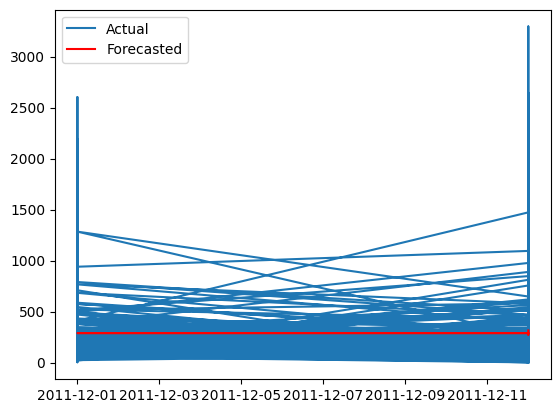

Forecasted Demand:  11771    315.033765
11772    290.236702
11773    289.700485
11774    274.386537
11775    273.182123
            ...    
14709    289.275583
14710    289.275583
14711    289.275583
14712    289.275583
14713    289.275583
Name: predicted_mean, Length: 2943, dtype: float64


In [88]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Select the target column (e.g., 'Lag_Quantity')
ts_data = df_agg['Lag_Quantity']

# Split data into training and testing
train_size = int(len(ts_data) * 0.8)  # 80% for training
train, test = ts_data[:train_size], ts_data[train_size:]

# Fit the ARIMA model (you may want to fine-tune the p, d, q parameters)
model = ARIMA(train, order=(5, 1, 0))  # You can experiment with different values for p, d, q
model_fit = model.fit()

# Forecast the future
forecast = model_fit.forecast(steps=len(test))  # Forecast the test set period
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, forecast, label='Forecasted', color='red')
plt.legend()
plt.show()

# Print the forecasted demand
print("Forecasted Demand: ", forecast)


# Inventory Optimization

# calculate the Economic Order Quantity (EOQ) to find the optimal order quantity that minimizes the total cost of inventory (ordering cost and holding cost).

In [89]:
# EOQ formula: EOQ = sqrt((2 * D * S) / H)
# Where:
# D = Total demand (forecasted demand)
# S = Ordering cost per order
# H = Holding cost per unit per year

# Example costs (You can adjust these based on your business)
S = 50  # Ordering cost per order
H = 2   # Holding cost per unit per year

# Total demand (from forecasted values)
D = forecast.sum()  # Sum of the forecasted demand

# Calculate EOQ
EOQ = (2 * D * S / H) ** 0.5
print(f"Optimal Order Quantity (EOQ): {EOQ}")


Optimal Order Quantity (EOQ): 6524.36051331648


# Safety Stock Calculation:

# Safety stock ensures you have extra inventory to account for variability in demand.

In [90]:
# Safety Stock = Z * sigma_d * sqrt(LT)
# Z = Z-score (1.64 for 95% service level)
# sigma_d = Standard deviation of demand
# LT = Lead time (in days)

Z = 1.64  # 95% service level
sigma_d = ts_data.std()  # Standard deviation of demand
LT = 7  # Lead time (days)

safety_stock = Z * sigma_d * (LT) ** 0.5
print(f"Safety Stock: {safety_stock}")


Safety Stock: 3318.2972825494153


# Optimize Stock Levels:

# You can now calculate the optimal stock level:

In [91]:
# Reorder Point (ROP) = Average Demand * Lead Time + Safety Stock
ROP = (ts_data.mean() * LT) + safety_stock
print(f"Reorder Point (ROP): {ROP}")

# Optimal Inventory Level = EOQ + Safety Stock
optimal_inventory_level = EOQ + safety_stock
print(f"Optimal Inventory Level: {optimal_inventory_level}")


Reorder Point (ROP): 5274.685959999463
Optimal Inventory Level: 9842.657795865896


# Key Results:
The key findings from our inventory optimization analysis are:

1) Economic Order Quantity (EOQ): 6524 units. This quantity represents the optimal order size, balancing the costs of ordering and holding inventory. By ordering 6524 units at a time, the business can minimize total inventory costs, ensuring efficient stock replenishment while reducing unnecessary expenses.

2) Safety Stock: 3318.30 units. This is the buffer stock held to safeguard against demand fluctuations or potential supply chain disruptions. The calculated safety stock level ensures that there will be enough inventory to meet customer demand even during unexpected spikes, thus avoiding stockouts.

3) Reorder Point (ROP): 5274.69 units. The reorder point indicates when the inventory level reaches a threshold that triggers a new order. This ensures that stock is replenished in time to prevent shortages while avoiding excess inventory.

4) Optimal Inventory Level: 9842.66 units. This is the ideal inventory level that minimizes costs associated with both stockouts and overstocking. Maintaining this optimal level ensures that the business has sufficient stock to meet demand without carrying excess inventory that incurs unnecessary holding costs.

In [92]:
df_agg

,Year,Month,CustomerID,Weekday,Quantity,Revenue,UnitPrice,AvgRevenuePerCustomer,TotalQuantityPerMonth,TotalRevenuePerMonth,Lag_Quantity,Lag_Revenue,MA_Quantity,MA_Revenue,Day
Date,,,,,,,,,,,,,,,
2010-01-12,2010.0,1.0,-1,1,2669,10588.96,4.403496,-10588.960000,20480,45891.82,0.0,0.00,279.412543,552.997384,12
2010-01-12,2010.0,1.0,12431,1,107,358.25,5.278571,0.028819,20480,45891.82,2669.0,10588.96,279.412543,552.997384,12
2010-01-12,2010.0,1.0,12433,1,1852,1919.14,1.406438,0.154359,20480,45891.82,107.0,358.25,1542.666667,4288.783333,12
2010-01-12,2010.0,1.0,12583,1,449,855.86,2.764500,0.068017,20480,45891.82,1852.0,1919.14,802.666667,1044.416667,12
2010-01-12,2010.0,1.0,12662,1,157,261.48,2.958000,0.020651,20480,45891.82,449.0,855.86,819.333333,1012.160000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-12-12,2011.0,12.0,18283,3,66,105.30,1.863636,0.005759,1677785,3237072.07,100.0,139.89,121.333333,180.570000,12
2011-12-12,2011.0,12.0,18283,5,61,112.99,2.153158,0.006180,1677785,3237072.07,66.0,105.30,75.666667,119.393333,12
2011-12-12,2011.0,12.0,18283,6,86,115.60,1.468000,0.006323,1677785,3237072.07,61.0,112.99,71.000000,111.296667,12
